# Assignment 4

# Team Id PNT2022TMID34405

## Name: Jithu Presannan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 2. Loading Dataset

In [3]:
ds = pd.read_csv(r"D:\IBM\Mall_Customers.csv")

In [4]:
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
ds.rename(columns={"Annual Income (k$)":"annual_income",
                     "Spending Score (1-100)":"spending_scores"},inplace=True)
ds.head()

,CustomerID,Gender,Age,annual_income,spending_scores
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# 3.Data Visualizations

## i) Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

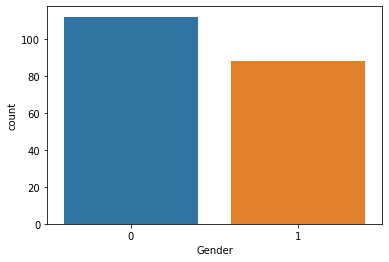

In [48]:
#Countplot

sns.countplot(ds['Gender'])

(array([112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

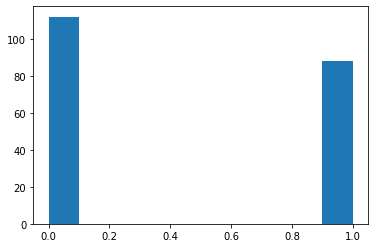

In [49]:
#Histplot

plt.hist(ds['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

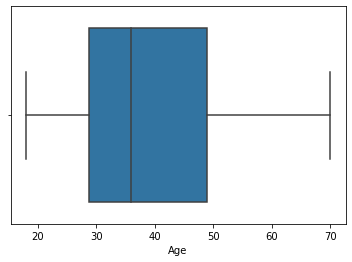

In [50]:
#Boxplot

sns.boxplot(ds['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

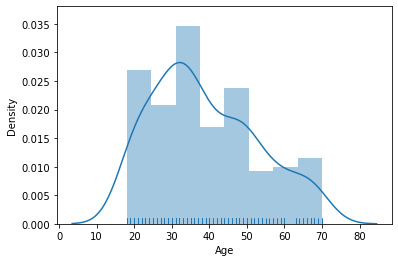

In [51]:
#Dist plot

sns.distplot(ds['Age'],rug=True)

## ii) Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Age'>

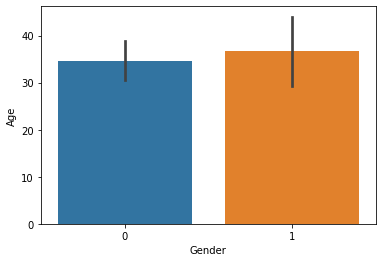

In [52]:
#Bar plot

sns.barplot(data=ds.head(50), x="Gender", y="Age")

<AxesSubplot:xlabel='Gender', ylabel='Age'>

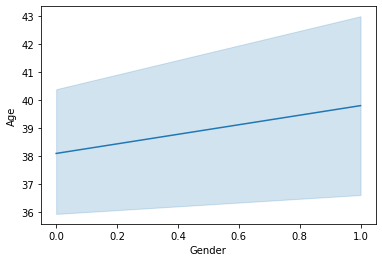

In [53]:
##Line Plot

sns.lineplot(x=ds['Gender'],y=ds['Age'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

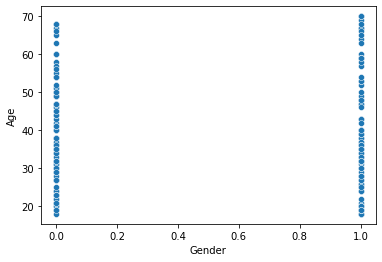

In [54]:
#Scatter plot

sns.scatterplot(x=ds['Gender'],y=ds['Age'])

## iii) Multi variate Analysis

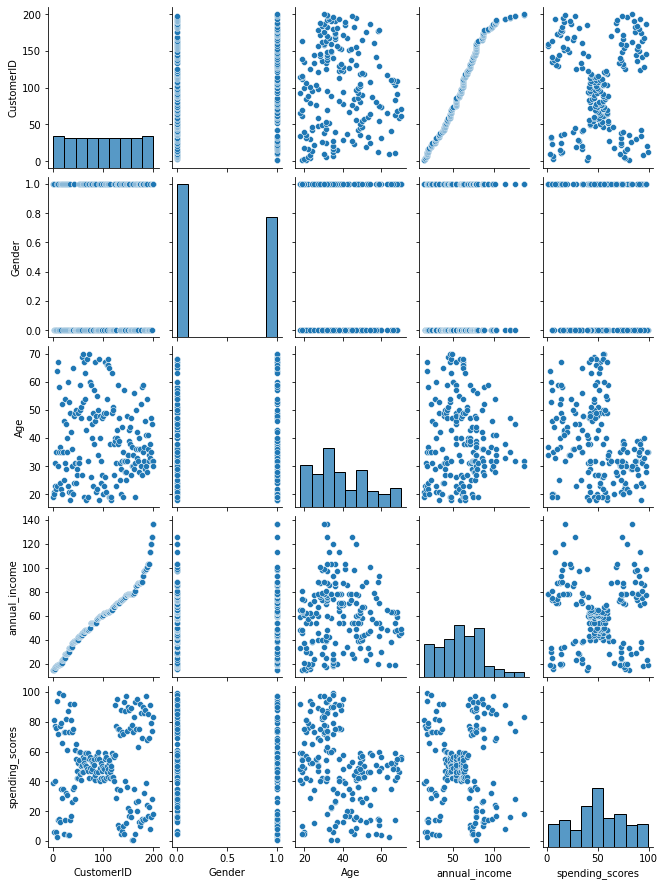

In [55]:
#Pairplot

sns.pairplot(data=ds,aspect=.75)

<AxesSubplot:>

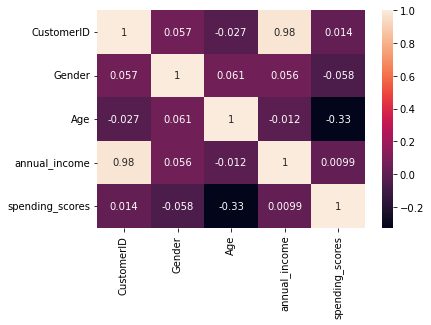

In [56]:
#Heatmap

sns.heatmap(ds.corr(), annot = True)

# 4. Descriptive Statistics

In [57]:
ds.describe()

,CustomerID,Gender,Age,annual_income,spending_scores
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [58]:
#Mean

ds.mean()

CustomerID         100.50
Gender               0.44
Age                 38.85
annual_income       60.56
spending_scores     50.20
dtype: float64

In [59]:
#Median

ds.median()

CustomerID         100.5
Gender               0.0
Age                 36.0
annual_income       61.5
spending_scores     50.0
dtype: float64

In [60]:
#Mode

ds.mode()

,CustomerID,Gender,Age,annual_income,spending_scores
0,1,0.0,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [61]:
#Standard Deviation

ds.std()

CustomerID         57.879185
Gender              0.497633
Age                13.969007
annual_income      26.264721
spending_scores    25.823522
dtype: float64

# 5. Checking and Dealing with missing values

In [62]:
ds.isnull().sum()

CustomerID         0
Gender             0
Age                0
annual_income      0
spending_scores    0
dtype: int64

# 6. Outliers and Replacing them

In [63]:
outliers=ds.quantile(q=(0.25,0.75))
outliers

,CustomerID,Gender,Age,annual_income,spending_scores
0.25,50.75,0.0,28.75,41.5,34.75
0.75,150.25,1.0,49.00,78.0,73.00


In [64]:
Q1 = ds.Age.quantile(0.25)
Q3 = ds.Age.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
ds.median(numeric_only=True)

CustomerID         100.5
Gender               0.0
Age                 36.0
annual_income       61.5
spending_scores     50.0
dtype: float64

In [65]:
ds['Age'] = np.where(ds['Age'] < lower_limit, 7, ds['Age'])

<AxesSubplot:xlabel='Age'>

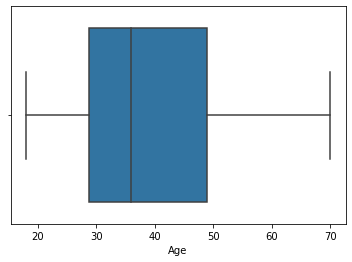

In [66]:
sns.boxplot(x=ds.Age,showfliers = False)

# 7.Checking for Categorical columns and perform Encoding

In [67]:
ds.head()

,CustomerID,Gender,Age,annual_income,spending_scores
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [68]:
ds.columns

Index(['CustomerID', 'Gender', 'Age', 'annual_income', 'spending_scores'], dtype='object')

In [69]:
x=ds[["Age","CustomerID"]]
x.head()

,Age,CustomerID
0,19,1
1,21,2
2,20,3
3,23,4
4,31,5


In [70]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
st_scale = scale.fit_transform(x)
st_scale

array([[-1.42456879, -1.7234121 ],
       [-1.28103541, -1.70609137],
       [-1.3528021 , -1.68877065],
       [-1.13750203, -1.67144992],
       [-0.56336851, -1.6541292 ],
       [-1.20926872, -1.63680847],
       [-0.27630176, -1.61948775],
       [-1.13750203, -1.60216702],
       [ 1.80493225, -1.5848463 ],
       [-0.6351352 , -1.56752558],
       [ 2.02023231, -1.55020485],
       [-0.27630176, -1.53288413],
       [ 1.37433211, -1.5155634 ],
       [-1.06573534, -1.49824268],
       [-0.13276838, -1.48092195],
       [-1.20926872, -1.46360123],
       [-0.27630176, -1.4462805 ],
       [-1.3528021 , -1.42895978],
       [ 0.94373197, -1.41163905],
       [-0.27630176, -1.39431833],
       [-0.27630176, -1.3769976 ],
       [-0.99396865, -1.35967688],
       [ 0.51313183, -1.34235616],
       [-0.56336851, -1.32503543],
       [ 1.08726535, -1.30771471],
       [-0.70690189, -1.29039398],
       [ 0.44136514, -1.27307326],
       [-0.27630176, -1.25575253],
       [ 0.08253169,

# 9. Clustering

In [71]:
from sklearn.cluster import KMeans

In [72]:
x.drop('CustomerID',axis=1,inplace=True)

C:\Users\AjinAbishek\AppData\Local\Temp\ipykernel_1096\3806144439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('CustomerID',axis=1,inplace=True)


In [73]:
km = KMeans(n_clusters=3, random_state=0)

In [74]:
x['Group or Cluster'] = km.fit_predict(x)
x.head()

C:\Users\AjinAbishek\AppData\Local\Temp\ipykernel_1096\3721569487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Group or Cluster'] = km.fit_predict(x)


,Age,Group or Cluster
0,19,0
1,21,0
2,20,0
3,23,0
4,31,0


In [75]:
x['Group or Cluster'].value_counts()

0    104
2     62
1     34
Name: Group or Cluster, dtype: int64

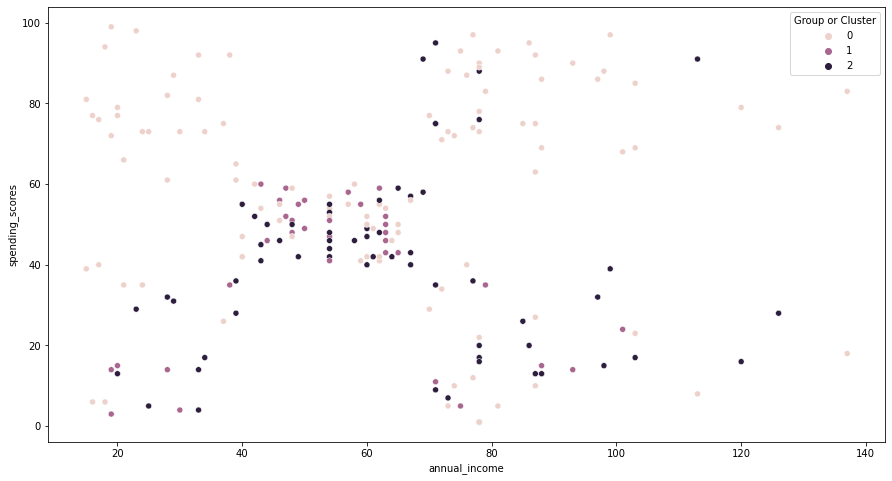

In [90]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=ds['annual_income'],
                y=ds['spending_scores'],
                hue=x['Group or Cluster'])
plt.show()

In [85]:
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(x, 
                         km.labels_, 
                         metric='euclidean')
score

0.5720936424387716